In [1]:
pip install cryptocompare

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 62.8/62.8 kB ? eta 0:00:00
     ---------------------------------------- 96.7/96.7 kB ? eta 0:00:00
     -------------------------------------- 140.9/140.9 kB 8.7 MB/s eta 0:00:00
     -------------------------------------- 155.3/155.3 kB 9.7 MB/s eta 0:00:00
  Running setup.py install for cryptocompare: started
  Running setup.py install for cryptocompare: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  DEPRECATION: cryptocompare is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import cryptocompare
import datetime
import time
from collections import defaultdict

def get_historical_data(symbol, currency, days):
    to_timestamp = int(time.mktime(datetime.datetime.now().timetuple()))
    one_day = 86400  # 24 hours in seconds
    from_timestamp = to_timestamp - days * one_day

    data = cryptocompare.get_historical_price_hour(
        symbol, currency=currency, toTs=to_timestamp, limit=days * 24
    )

    return data

def analyze_ethereum_prices(data):
    lowest_prices = []
    highest_prices = []
    lowest_times = defaultdict(int)
    highest_times = defaultdict(int)

    current_day = None
    daily_low = None
    daily_high = None
    daily_low_time = None
    daily_high_time = None

    for hour in data:
        timestamp = hour['time']
        dt = datetime.datetime.fromtimestamp(timestamp)
        low_price = hour['low']
        high_price = hour['high']

        if current_day is None or current_day != dt.day:
            if current_day is not None:
                lowest_prices.append(daily_low)
                highest_prices.append(daily_high)
                lowest_times[daily_low_time.strftime('%H:%M')] += 1
                highest_times[daily_high_time.strftime('%H:%M')] += 1

            current_day = dt.day
            daily_low = low_price
            daily_high = high_price
            daily_low_time = dt
            daily_high_time = dt
        else:
            if low_price < daily_low:
                daily_low = low_price
                daily_low_time = dt

            if high_price > daily_high:
                daily_high = high_price
                daily_high_time = dt

    return lowest_prices, highest_prices, lowest_times, highest_times

symbol = 'ETH'
currency = 'USD'
days = 30  # Number of days to analyze

end_date = datetime.datetime.now().date()
start_date = end_date - datetime.timedelta(days=days)
print(f"Analyzing Ethereum prices from {start_date} to {end_date}")

data = get_historical_data(symbol, currency, days)
lowest_prices, highest_prices, lowest_times, highest_times = analyze_ethereum_prices(data)
print("Lowest prices for each day:", lowest_prices)
print("Highest prices for each day:", highest_prices)
print("Lowest price times frequency:", lowest_times)
print("Highest price times frequency:", highest_times)


Analyzing Ethereum prices from 2023-02-20 to 2023-03-22
Lowest prices for each day: [1652.65, 1637.57, 1598.66, 1630.04, 1577.26, 1560.62, 1588.49, 1609.58, 1598.81, 1597.2, 1619.77, 1548.37, 1550.37, 1556.08, 1555.75, 1536.97, 1542.41, 1409.71, 1372.22, 1417.78, 1460.07, 1571.05, 1664.87, 1615.53, 1638.35, 1666, 1753.25, 1756.87, 1743.93, 1724.38]
Highest prices for each day: [1719.4, 1716.4, 1665.93, 1678.49, 1664.27, 1611.19, 1648.88, 1664.42, 1647.24, 1669, 1677.38, 1650.88, 1577.08, 1587.46, 1582.34, 1582.88, 1570.15, 1546.86, 1439.7, 1491.16, 1605.89, 1699.86, 1783.34, 1721.91, 1694.39, 1787.58, 1843.84, 1845.85, 1815.28, 1838.29]
Lowest price times frequency: defaultdict(<class 'int'>, {'02:00': 2, '22:00': 3, '17:00': 3, '13:00': 2, '21:00': 4, '03:00': 2, '01:00': 2, '15:00': 1, '06:00': 1, '16:00': 1, '23:00': 1, '11:00': 1, '09:00': 1, '10:00': 1, '05:00': 2, '18:00': 1, '00:00': 1, '08:00': 1})
Highest price times frequency: defaultdict(<class 'int'>, {'12:00': 1, '03:00': 

Lowest prices for each day: This is a list of the lowest Ethereum prices for each day within the specified time frame (last 30 days in this case). Each value in the list represents the lowest price recorded for Ethereum during a single day.

Highest prices for each day: This is a list of the highest Ethereum prices for each day within the specified time frame (last 30 days in this case). Each value in the list represents the highest price recorded for Ethereum during a single day.

Lowest price times frequency: This is a dictionary that shows the frequency of the times at which the lowest prices occurred. The keys in the dictionary represent the time of day (in hours and minutes, e.g., '02:00', '22:00'), and the values represent the number of times the lowest price of the day occurred at that particular time. For example, '02:00': 2 means that the lowest price of the day occurred at 2:00 AM on two separate days within the analyzed time frame.

Highest price times frequency: This is a dictionary that shows the frequency of the times at which the highest prices occurred. The keys in the dictionary represent the time of day (in hours and minutes, e.g., '12:00', '03:00'), and the values represent the number of times the highest price of the day occurred at that particular time. For example, '12:00': 1 means that the highest price of the day occurred at 12:00 PM on one day within the analyzed time frame.

In [9]:
import cryptocompare
import datetime
import time
from collections import defaultdict, Counter
import statistics

def get_historical_data(symbol, currency, days):
    to_timestamp = int(time.mktime(datetime.datetime.now().timetuple()))
    one_day = 86400  # 24 hours in seconds
    from_timestamp = to_timestamp - days * one_day

    data = cryptocompare.get_historical_price_hour(
        symbol, currency=currency, toTs=to_timestamp, limit=days * 24
    )

    return data

def analyze_ethereum_prices(data):
    lowest_prices = []
    highest_prices = []
    lowest_times = defaultdict(int)
    highest_times = defaultdict(int)

    current_day = None
    daily_low = None
    daily_high = None
    daily_low_time = None
    daily_high_time = None

    for hour in data:
        timestamp = hour['time']
        dt = datetime.datetime.fromtimestamp(timestamp)
        low_price = hour['low']
        high_price = hour['high']

        if current_day is None or current_day != dt.day:
            if current_day is not None:
                lowest_prices.append(daily_low)
                highest_prices.append(daily_high)
                lowest_times[daily_low_time.strftime('%H:%M')] += 1
                highest_times[daily_high_time.strftime('%H:%M')] += 1

            current_day = dt.day
            daily_low = low_price
            daily_high = high_price
            daily_low_time = dt
            daily_high_time = dt
        else:
            if low_price < daily_low:
                daily_low = low_price
                daily_low_time = dt

            if high_price > daily_high:
                daily_high = high_price
                daily_high_time = dt

    return lowest_prices, highest_prices, lowest_times, highest_times

def avg_time(times):
    total_seconds = sum(int(t.hour * 3600 + t.minute * 60 + t.second) for t in times)
    avg_seconds = total_seconds / len(times)
    hours, remainder = divmod(avg_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return datetime.time(int(hours), int(minutes), int(seconds))

def mode_time(times):
    counter = Counter(times)
    return counter.most_common(1)[0][0]

def median_time(times):
    sorted_times = sorted(times)
    middle = len(times) // 2
    if len(times) % 2 == 0:
        median_time = avg_time([sorted_times[middle - 1], sorted_times[middle]])
    else:
        median_time = sorted_times[middle]
    return median_time

symbol = 'ETH'
currency = 'USD'
days = 30  # Number of days to analyze

data = get_historical_data(symbol, currency, days)
lowest_prices, highest_prices, lowest_times, highest_times = analyze_ethereum_prices(data)

lowest_time_list = [datetime.datetime.strptime(t, "%H:%M").time() for t in lowest_times.keys()]
highest_time_list = [datetime.datetime.strptime(t, "%H:%M").time() for t in highest_times.keys()]

print("Mode time for lowest prices:", mode_time(lowest_time_list))
print("Median time for lowest prices:", median_time(lowest_time_list))
print("Average time for lowest prices:", avg_time(lowest_time_list))

print("Mode time for highest prices:", mode_time(highest_time_list))
print("Median time for highest prices:", median_time(highest_time_list))
print("Average time for highest prices:", avg_time(highest_time_list))


Mode time for lowest prices: 02:00:00
Median time for lowest prices: 10:30:00
Average time for lowest prices: 11:06:40
Mode time for highest prices: 12:00:00
Median time for highest prices: 13:30:00
Average time for highest prices: 11:30:00


In [12]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip install statsmodels

  Using cached statsmodels-0.13.5-cp311-cp311-win_amd64.whl (9.0 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install pandas numpy matplotlib seaborn statsmodels fbprophet

     -------------------------------------- 293.3/293.3 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 9.0/9.0 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 64.0/64.0 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 233.8/233.8 kB 1.6 MB/s eta 0:00:00
  Using cached Cython-0.29.33-py2.py3-none-any.whl (987 kB)
     ---------------------------------------- 47.9/47.9 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 378.2/378.2 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 340.1/340.1 kB 4.2 MB/s eta 0:00:00
     ----------------------

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\qvamb\AppData\Local\Temp\pip-install-yyrvvn64\pystan_2e5bab73550c4b86a5f24d38faec4f07\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


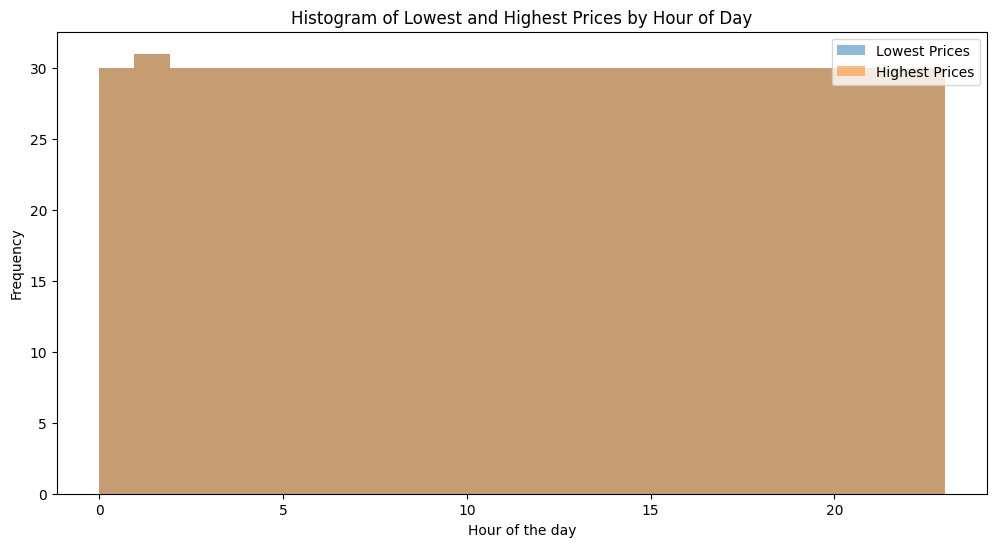

Lowest prices: Standard deviation = 6.92841313589645 Variance = 48.002908581662474
Highest prices: Standard deviation = 6.92841313589645 Variance = 48.002908581662474


C:\Users\qvamb\AppData\Local\Temp\ipykernel_4808\874622966.py:115: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['low'].index.hour, label='Lowest Prices', shade=True)
C:\Users\qvamb\AppData\Local\Temp\ipykernel_4808\874622966.py:116: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['high'].index.hour, label='Highest Prices', shade=True)


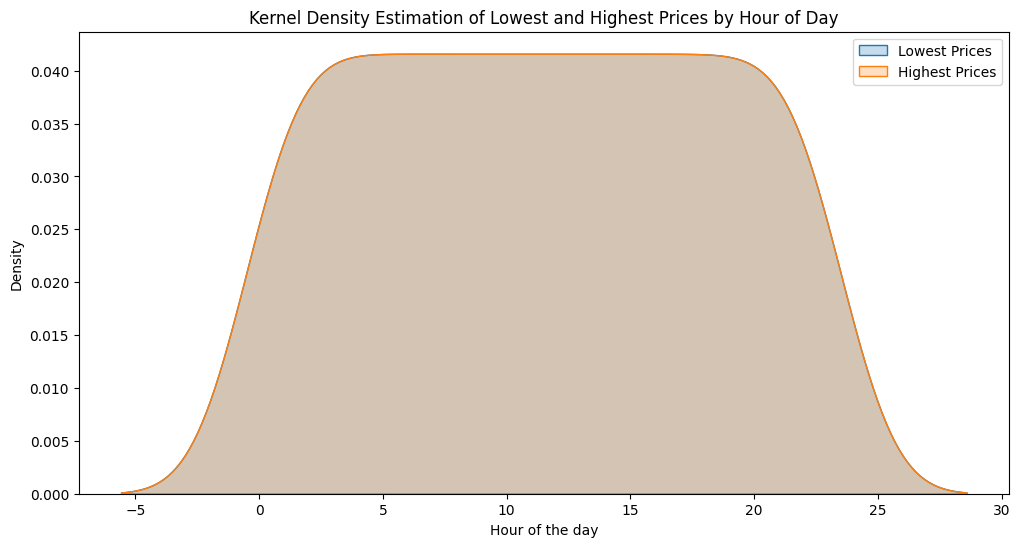

c:\Users\qvamb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\qvamb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\qvamb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\qvamb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\qvamb\AppData\Local\Programs\Python\Python311\Lib\s

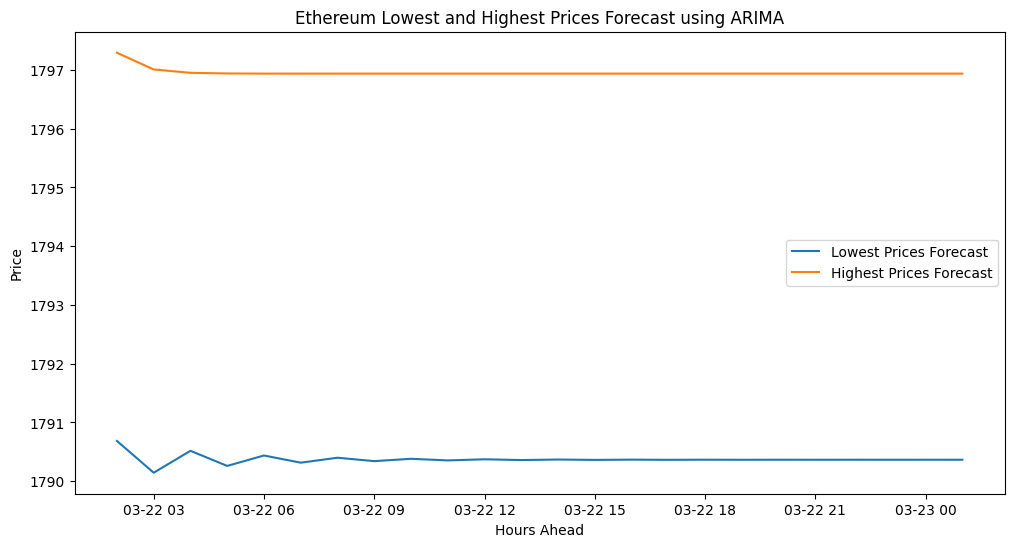

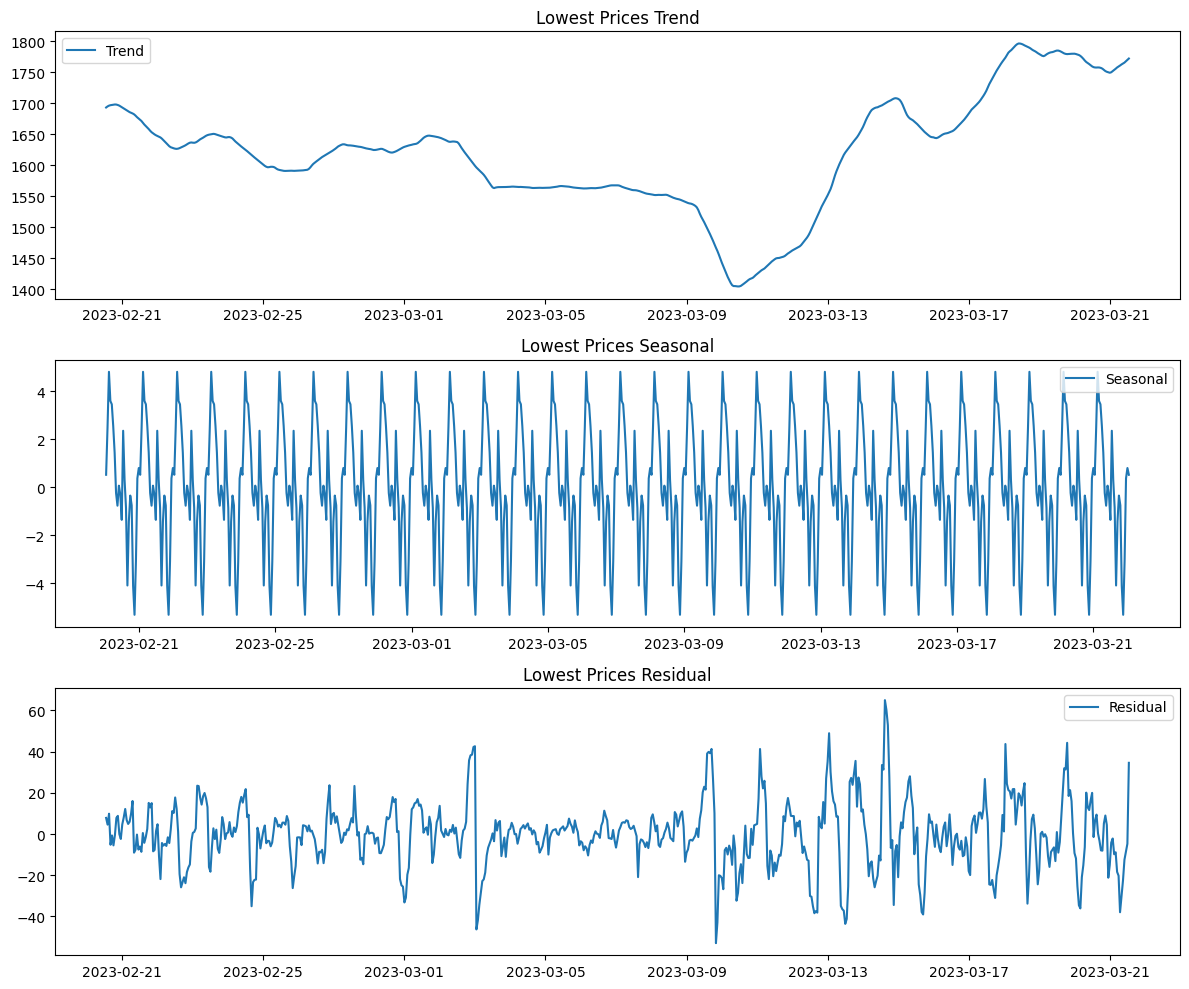

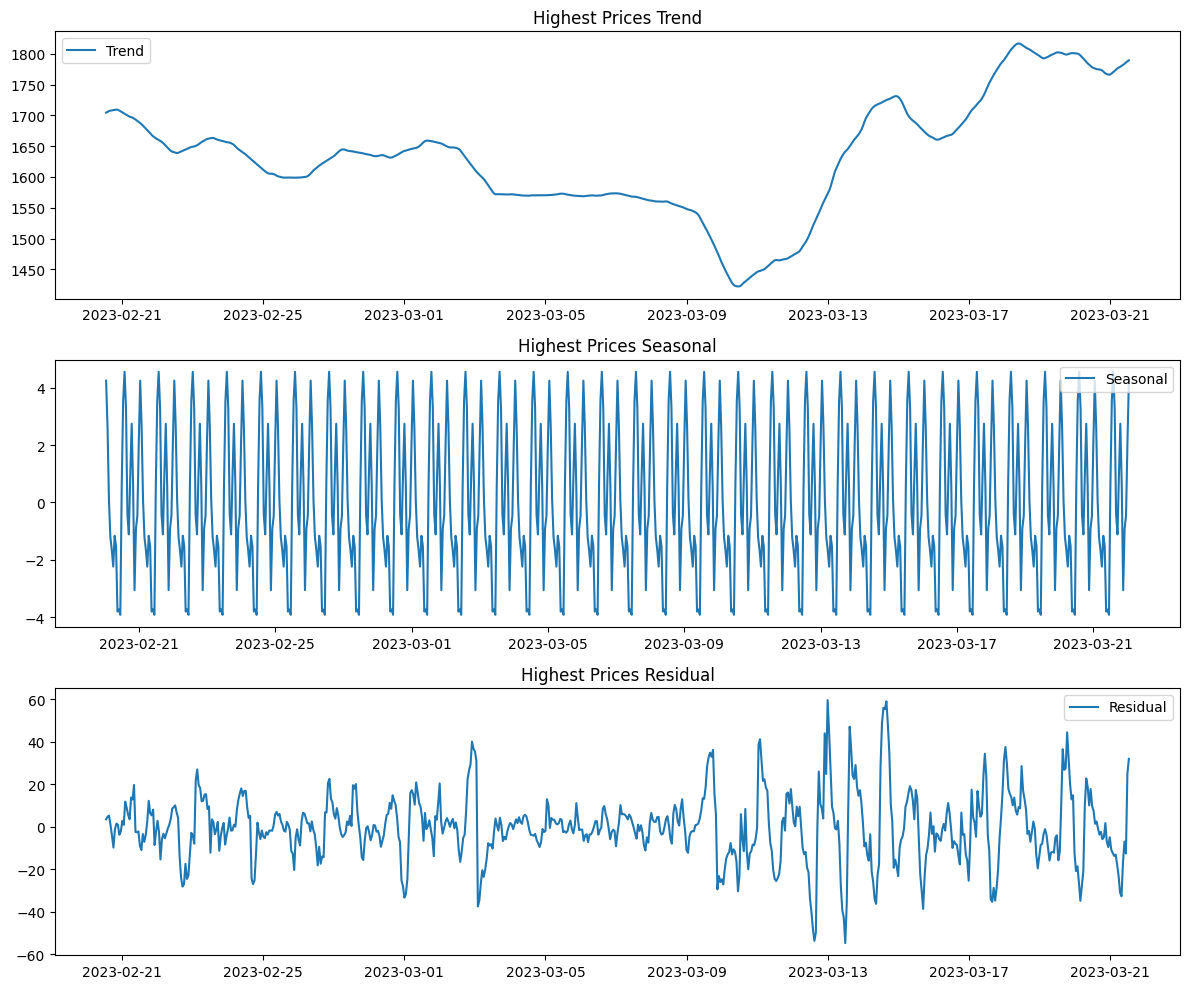

In [27]:
import cryptocompare
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

def get_historical_data(symbol, currency, days):
    to_timestamp = int(time.mktime(datetime.datetime.now().timetuple()))
    one_day = 86400  # 24 hours in seconds
    from_timestamp = to_timestamp - days * one_day

    data = cryptocompare.get_historical_price_hour(
        symbol, currency=currency, toTs=to_timestamp, limit=days * 24
    )

    return data

def analyze_ethereum_prices(data):
    lowest_prices = []
    highest_prices = []
    lowest_times = defaultdict(int)
    highest_times = defaultdict(int)

    current_day = None
    daily_low = None
    daily_high = None
    daily_low_time = None
    daily_high_time = None

    for hour in data:
        timestamp = hour['time']
        dt = datetime.datetime.fromtimestamp(timestamp)
        low_price = hour['low']
        high_price = hour['high']

        if current_day is None or current_day != dt.day:
            if current_day is not None:
                lowest_prices.append(daily_low)
                highest_prices.append(daily_high)
                lowest_times[daily_low_time.strftime('%H:%M')] += 1
                highest_times[daily_high_time.strftime('%H:%M')] += 1

            current_day = dt.day
            daily_low = low_price
            daily_high = high_price
            daily_low_time = dt
            daily_high_time = dt
        else:
            if low_price < daily_low:
                daily_low = low_price
                daily_low_time = dt

            if high_price > daily_high:
                daily_high = high_price
                daily_high_time = dt

    return lowest_prices, highest_prices, lowest_times, highest_times

def avg_time(times):
    total_seconds = sum(int(t.hour * 3600 + t.minute * 60 + t.second) for t in times)
    avg_seconds = total_seconds / len(times)
    hours, remainder = divmod(avg_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return datetime.time(int(hours), int(minutes), int(seconds))

def mode_time(times):
    counter = Counter(times)
    return counter.most_common(1)[0][0]

def median_time(times):
    sorted_times = sorted(times)
    middle = len(times) // 2
    if len(times) % 2 == 0:
        median_time = avg_time([sorted_times[middle - 1], sorted_times[middle]])
    else:
        median_time = sorted_times[middle]
    return median_time

def preprocess_data(data):
    df = pd.DataFrame(data)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

symbol = 'ETH'
currency = 'USD'
days = 30

data = get_historical_data(symbol, currency, days)
df = preprocess_data(data)

# 1. Histogram
plt.figure(figsize=(12, 6))
plt.hist(df['low'].index.hour, bins=24, alpha=0.5, label='Lowest Prices')
plt.hist(df['high'].index.hour, bins=24, alpha=0.5, label='Highest Prices')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Lowest and Highest Prices by Hour of Day')
plt.show()

# 2. Standard deviation and variance
low_hour = df['low'].index.hour
high_hour = df['high'].index.hour
low_std, high_std = np.std(low_hour), np.std(high_hour)
low_var, high_var = np.var(low_hour), np.var(high_hour)
print("Lowest prices: Standard deviation =", low_std, "Variance =", low_var)
print("Highest prices: Standard deviation =", high_std, "Variance =", high_var)

# 3. Kernel Density Estimation (KDE)
plt.figure(figsize=(12, 6))
sns.kdeplot(df['low'].index.hour, label='Lowest Prices', shade=True)
sns.kdeplot(df['high'].index.hour, label='Highest Prices', shade=True)
plt.xlabel('Hour of the day')
plt.ylabel('Density')
plt.legend()
plt.title('Kernel Density Estimation of Lowest and Highest Prices by Hour of Day')
plt.show()

# 4. Time Series Forecasting using Prophet
from statsmodels.tsa.arima.model import ARIMA

# Function to forecast using ARIMA
def forecast_arima(series, steps=24):
    model = ARIMA(series, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# 4. Time Series Forecasting using ARIMA
arima_low_forecast = forecast_arima(df['low'])
arima_high_forecast = forecast_arima(df['high'])

# Plotting ARIMA forecasts
plt.figure(figsize=(12, 6))
plt.plot(arima_low_forecast, label='Lowest Prices Forecast')
plt.plot(arima_high_forecast, label='Highest Prices Forecast')
plt.xlabel('Hours Ahead')
plt.ylabel('Price')
plt.legend()
plt.title('Ethereum Lowest and Highest Prices Forecast using ARIMA')
plt.show()


# 5. Seasonal Decomposition
# 5. Seasonal Decomposition
decomposition_low = seasonal_decompose(df['low'], model='additive', period=24)
decomposition_high = seasonal_decompose(df['high'], model='additive', period=24)

# Plotting seasonal decomposition for lowest prices
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
axes[0].plot(decomposition_low.trend, label='Trend')
axes[0].legend()
axes[0].set_title('Lowest Prices Trend')
axes[1].plot(decomposition_low.seasonal, label='Seasonal')
axes[1].legend()
axes[1].set_title('Lowest Prices Seasonal')
axes[2].plot(decomposition_low.resid, label='Residual')
axes[2].legend()
axes[2].set_title('Lowest Prices Residual')
plt.tight_layout()
plt.show()

# Plotting seasonal decomposition for highest prices
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
axes[0].plot(decomposition_high.trend, label='Trend')
axes[0].legend()
axes[0].set_title('Highest Prices Trend')
axes[1].plot(decomposition_high.seasonal, label='Seasonal')
axes[1].legend()
axes[1].set_title('Highest Prices Seasonal')
axes[2].plot(decomposition_high.resid, label='Residual')
axes[2].legend()
axes[2].set_title('Highest Prices Residual')
plt.tight_layout()
plt.show()

